In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
RANDOM_STATE = 55
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("DataSet/drug200.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
cat_variables = ['Sex',
                 'BP',
                 'Cholesterol',
                 'Drug'
]

In [5]:
df = pd.get_dummies(data = df, prefix = cat_variables, columns = cat_variables)

In [6]:
df.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,23,25.355,True,False,True,False,False,True,False,False,False,False,False,True
1,47,13.093,False,True,False,True,False,True,False,False,False,True,False,False
2,47,10.114,False,True,False,True,False,True,False,False,False,True,False,False
3,28,7.798,True,False,False,False,True,True,False,False,False,False,True,False
4,61,18.043,True,False,False,True,False,True,False,False,False,False,False,True


In [7]:
features = [x for x in df.columns if not x.startswith('Drug_drug')]
features

['Age',
 'Na_to_K',
 'Sex_F',
 'Sex_M',
 'BP_HIGH',
 'BP_LOW',
 'BP_NORMAL',
 'Cholesterol_HIGH',
 'Cholesterol_NORMAL']

In [8]:
print(len(features))

9


In [9]:
# กรณี target เป็น one-hot
if 'Drug_drug' not in df.columns:
    df['Drug_drug'] = df[['Drug_drugA', 'Drug_drugB', 'Drug_drugC', 'Drug_drugX', 'Drug_drugY']].idxmax(axis=1)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Drug_label'] = le.fit_transform(df['Drug_drug'])

print(le.classes_)      # ['Drug_drugA' 'Drug_drugB' 'Drug_drugC' 'Drug_drugX' 'Drug_drugY']


['Drug_drugA' 'Drug_drugB' 'Drug_drugC' 'Drug_drugX' 'Drug_drugY']


In [10]:
df

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY,Drug_drug,Drug_label
0,23,25.355,True,False,True,False,False,True,False,False,False,False,False,True,Drug_drugY,4
1,47,13.093,False,True,False,True,False,True,False,False,False,True,False,False,Drug_drugC,2
2,47,10.114,False,True,False,True,False,True,False,False,False,True,False,False,Drug_drugC,2
3,28,7.798,True,False,False,False,True,True,False,False,False,False,True,False,Drug_drugX,3
4,61,18.043,True,False,False,True,False,True,False,False,False,False,False,True,Drug_drugY,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,True,False,False,True,False,True,False,False,False,True,False,False,Drug_drugC,2
196,16,12.006,False,True,False,True,False,True,False,False,False,True,False,False,Drug_drugC,2
197,52,9.894,False,True,False,False,True,True,False,False,False,False,True,False,Drug_drugX,3
198,23,14.020,False,True,False,False,True,False,True,False,False,False,True,False,Drug_drugX,3


In [11]:
# แยก train/test
X_train, X_val, y_train, y_val = train_test_split(
    df[features], 
    df['Drug_label'], 
    train_size=0.8, 
    random_state=RANDOM_STATE
)

In [12]:
X_train

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
102,28,13.127,True,False,False,True,False,True,False
180,22,22.818,True,False,True,False,False,False,True
115,51,18.295,False,True,True,False,False,True,False
100,31,11.871,False,True,True,False,False,False,True
11,34,19.199,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...
189,64,20.932,False,True,True,False,False,False,True
29,45,17.951,False,True,False,True,False,True,False
125,19,25.969,True,False,True,False,False,False,True
39,15,9.084,False,True,False,False,True,True,False


In [35]:
y_train.unique()

array([2, 4, 0, 3, 1])

In [14]:
proportions = pd.Series(y_train).value_counts(normalize=True).sort_index()
print(f'train samples: {len(X_train)} validation samples: {len(X_val)}')
print("Target proportions per class:")
for i, p in proportions.items():
    print(f'  Class {i}: {p:.4f}')

train samples: 160 validation samples: 40
Target proportions per class:
  Class 0: 0.1250
  Class 1: 0.0750
  Class 2: 0.0938
  Class 3: 0.2375
  Class 4: 0.4688


In [15]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# สมมติว่าคุณมี y_train เป็น array ของ labels
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

# แปลงเป็น dictionary
class_weight_dict = dict(zip(classes, class_weights))

In [16]:
print("Class weights:")
for class_id, weight in class_weight_dict.items():
    print(f"Class {class_id}: {weight:.4f}")

Class weights:
Class 0: 1.6000
Class 1: 2.6667
Class 2: 2.1333
Class 3: 0.8421
Class 4: 0.4267


In [17]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

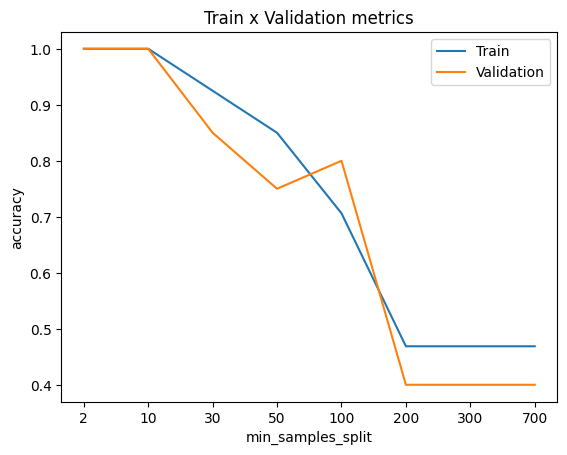

In [18]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

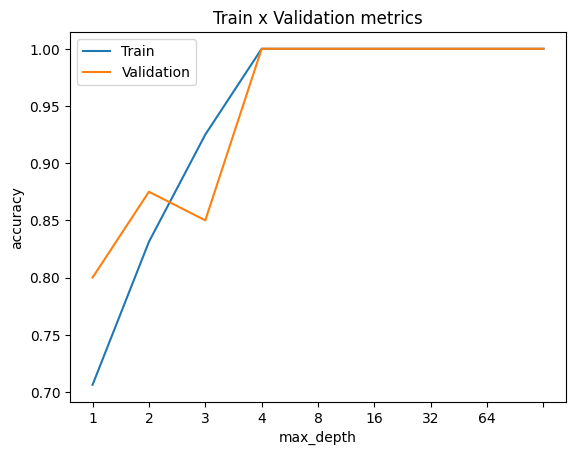

In [19]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [20]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 30,
                                             max_depth = 3,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [21]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9250
Metrics validation:
	Accuracy score: 0.8500


In [22]:
#Ramdom forest

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

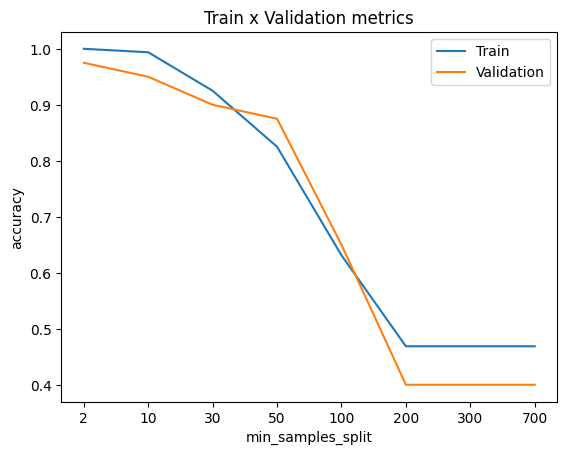

In [23]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

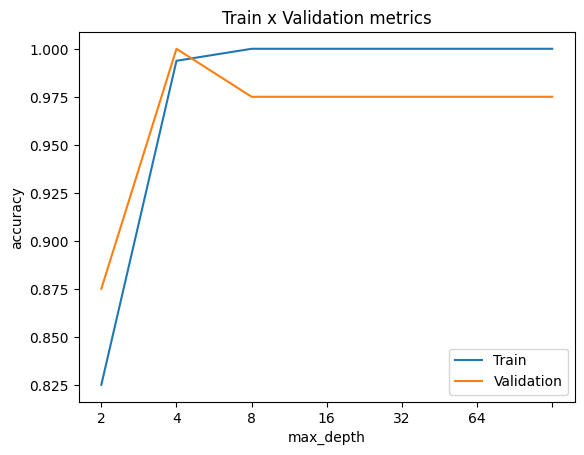

In [24]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

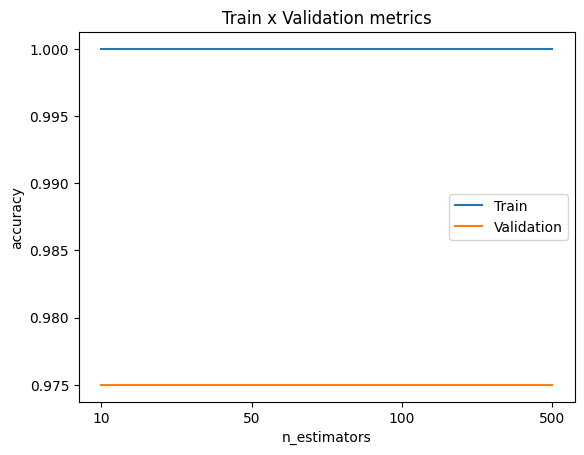

In [25]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [26]:
random_forest_model = RandomForestClassifier(n_estimators = 15,
                                             max_depth = 4, 
                                             min_samples_split = 6).fit(X_train,y_train)

In [27]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9875
Metrics test:
	Accuracy score: 0.9500


In [28]:
#XGBoost
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

In [29]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [30]:
y_train

102    2
180    4
115    4
100    0
11     4
      ..
189    4
29     4
125    4
39     3
154    4
Name: Drug_label, Length: 160, dtype: int64

In [31]:
from xgboost import XGBClassifier

# วิธีใหม่ (แนะนำ)
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.6,
    verbosity=1, 
    random_state=RANDOM_STATE,
    early_stopping_rounds=10  # ย้ายมาไว้ที่นี่
)

xgb_model.fit(
    X_train_fit, 
    y_train_fit, 
    eval_set=[(X_train_eval, y_train_eval)]
)

[0]	validation_0-mlogloss:0.70934
[1]	validation_0-mlogloss:0.47402
[2]	validation_0-mlogloss:0.36172
[3]	validation_0-mlogloss:0.30484
[4]	validation_0-mlogloss:0.28024
[5]	validation_0-mlogloss:0.27297
[6]	validation_0-mlogloss:0.26683
[7]	validation_0-mlogloss:0.24920
[8]	validation_0-mlogloss:0.25305
[9]	validation_0-mlogloss:0.25305
[10]	validation_0-mlogloss:0.25534
[11]	validation_0-mlogloss:0.25374
[12]	validation_0-mlogloss:0.25311
[13]	validation_0-mlogloss:0.25311
[14]	validation_0-mlogloss:0.25254
[15]	validation_0-mlogloss:0.25273
[16]	validation_0-mlogloss:0.25259


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,None


In [32]:
xgb_model.best_iteration

7

In [33]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9812
Metrics test:
	Accuracy score: 0.9500
